> Logistics Regression produces results in a binary which is used to predict the outcome of a categorical dependent variable. 
> 0 or1 1, Yes or No, True or False, High and Low

> The linear line has to be clipped at 0 and 1

### Logistics Regression with Titanic Dataset

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Reading data
df = pd.read_csv('/home/tuandinh/Desktop/MachineLearning/Logistics Regression/titanic dataset/tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Analyzing data

<AxesSubplot:xlabel='Survived', ylabel='count'>

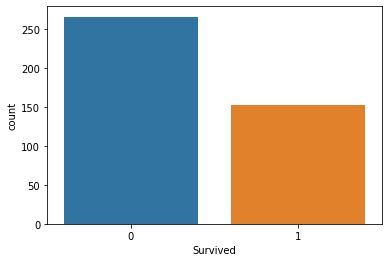

In [95]:
sns.countplot(x='Survived', data=df)


<AxesSubplot:xlabel='Survived', ylabel='count'>

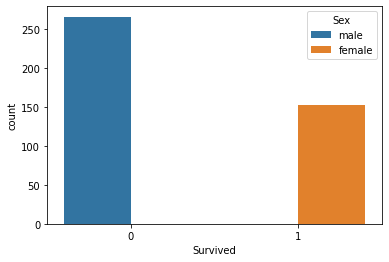

In [96]:
# Analysis of survival rates by sex
sns.countplot(x='Survived', hue='Sex', data= df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

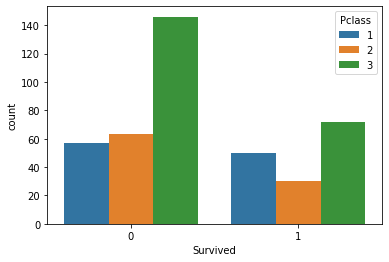

In [97]:
sns.countplot(x='Survived', hue='Pclass', data=df)

(array([11.,  5.,  7.,  9., 29., 42., 52., 45., 21., 22., 18., 19., 16.,
         9., 11.,  6.,  8.,  1.,  0.,  1.]),
 array([ 0.17  ,  3.9615,  7.753 , 11.5445, 15.336 , 19.1275, 22.919 ,
        26.7105, 30.502 , 34.2935, 38.085 , 41.8765, 45.668 , 49.4595,
        53.251 , 57.0425, 60.834 , 64.6255, 68.417 , 72.2085, 76.    ]),
 <BarContainer object of 20 artists>)

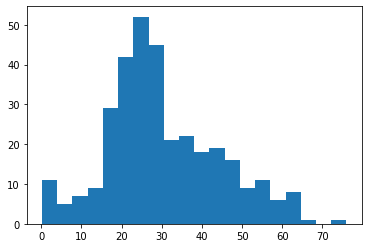

In [98]:
# Age statistics on board
plt.hist(x='Age', data=df, bins=20)

### Data Wrangling

In [99]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [100]:
# Checking missing value
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

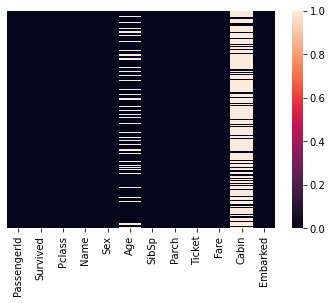

In [101]:
sns.heatmap(df.isnull(), yticklabels=False)

> We can see Pclass 1 tend to be older than Pclass 2 and 3

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

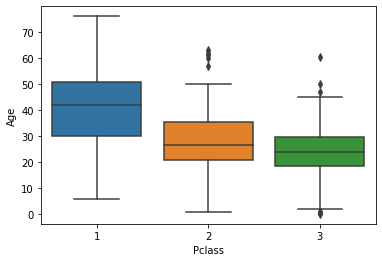

In [102]:
sns.boxplot(x='Pclass', y= 'Age', data=df)

In [103]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [104]:
df.drop("Cabin", axis=1, inplace=True)

In [105]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [106]:
df.dropna(inplace=True)

<AxesSubplot:>

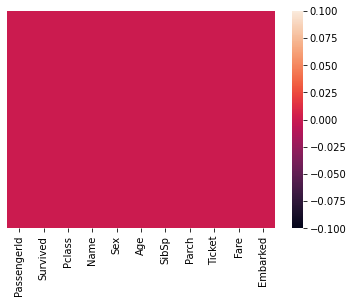

In [107]:
# Result when drop missing values
sns.heatmap(df.isnull(), yticklabels=False)

> Processing categorical variables

In [108]:
# drop_first = True rất quan trọng khi sử dụng, vì nó giúp giảm bớt cột thừa được tạo trong quá trình tạo biến giả. 
df = pd.get_dummies(df, columns=['Embarked','Sex'], drop_first=True)
df.head(3)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Sex_male
0,892,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,0,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,1,0
2,894,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,0,1


In [109]:
df.drop(['Name','Ticket', 'PassengerId','Pclass'],axis=1, inplace=True)
df.head(3)

,Survived,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,0,34.5,0,0,7.8292,1,0,1
1,1,47.0,1,0,7.0000,0,1,0
2,0,62.0,0,0,9.6875,1,0,1


### **Create and train model**

In [110]:
X = df.drop("Survived", axis=1)
Y = df["Survived"]

> If you have error look like this: ***ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.***
> 
> To fix this problem : It's okay to increase max_iter

In [111]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.8, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
# max_iter : Maximum number of iterations taken for the solvers to converge.
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [112]:
predictions = model.predict(x_test)

In [113]:
from sklearn.metrics import classification_report
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        45\n           1       1.00      1.00      1.00        22\n\n    accuracy                           1.00        67\n   macro avg       1.00      1.00      1.00        67\nweighted avg       1.00      1.00      1.00        67\n'

In [114]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[45,  0],
       [ 0, 22]])

In [115]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0